In [26]:
from PIL import Image
import pytesseract
import IPython
import os
import openai
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

In [59]:
def get_summary(image): 
    display(IPython.display.Image(filename=image))
    image = Image.open(image)

    custom_config = r'--oem 3 --psm 6'
    recipt = pytesseract.image_to_string(image, lang='pol+eng', config=custom_config)

    print(recipt)

    prompt_template=f'''
    You will be provided with text representing recipt in polish language with polish currency PLN. Extract and present in clear form: 
    *goods that were bought from the shop
    *don't show individual prices of goods
    *some goods can contain shortcuts, try to use full names if possible
    *shop name with address
    *total ammount spent in PRICE PLN format
    *date of purchase in dd/MM/YYYY format

    Output format should be:

    Purchased date: 
    Shop name and address:
    List of goods:

    Total price:

    Here is the recipt text:
    ```{recipt}```
    '''

    response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt_template}],
            temperature=0,
        )
    print(response.choices[0].message["content"])

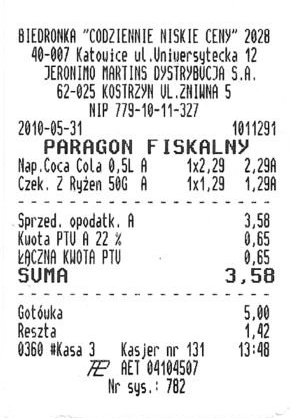

BIEDRONKA "CODZIENNIE NISKIE CENY” 2028
40-067 Katouice ul Uniuersytecka 12
JERONIMO MARTINS DYSTRYBUCJA S.A.
62-025 KOSTRZYN UL.ZNIANA 5
NIP 778-10-11-327
2040-05-31 101291
PARAGON FISKALNY
Nap.Coca Cola 0,5L A 1x2,29 2,298
Czek. 2 Ryżen 566 A 444,294,298
Sprzed, opodatk. A 3,58
Kuota PTU A 22 % 0,65
ŁĄCZNA KOTA PTU 0,65
SUMA 3,58
Gotówka 5,00
Reszta 1,42
0360 tKasa 3 Kasjer nr 131 13:48
FE RET 04104507
Nr sys. 782

Purchased date: 31/05/2040
Shop name and address: BIEDRONKA "CODZIENNIE NISKIE CENY” 2028, 40-067 Katowice ul. Uniwersytecka 12
List of goods: 
- Napój Coca Cola 0,5L
- Czekolada 2 Ryżen
- Sprzed, opodatk.
- Kuota PTU A 22%
- ŁĄCZNA KOTA PTU

Total price: 3,58 PLN


In [60]:
get_summary('recipt01.png')

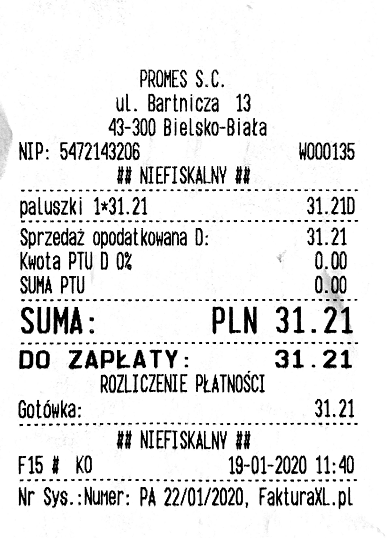

PROMES S.C.
ul. Bartnicza 13
43-300 Bielsko-Biata
NIP: 5472143206 4000135
cecceeeeees Hl MEPIS R
paluszki 882 | BZ
Sprzedaż opodatkowana D: 31.21
Kwota PTU D 0% 0.00
ŚWAPW 0.00
SUMA: PLN 31.21
DO ZAPŁATY: _ 31.21
ROZLICZENIE PŁATNOŚCI
Gotówka: | ........It:2l
kit NIEFISKALNY bli
FISH MO 19012000 11:40
Nr Sys. :Nuver: PA 22/01/2020, FakturaXL..pl

Purchased date: 22/01/2020
Shop name and address: 
PROMES S.C.
ul. Bartnicza 13
43-300 Bielsko-Biata

List of goods:
- paluszki 882
- BZ
- Sprzedaż opodatkowana

Total price: PLN 31.21


In [61]:
get_summary('recipt02.png')